# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*


# Pens and Printers Sales Analysis Report

## Executive Summary

This report presents a comprehensive analysis of Pens and Printers' sales data, focusing on optimizing revenue generation through various sales methods. Our analysis reveals that the 'Email + Call' approach consistently outperforms other methods, suggesting a clear path for strategic improvement. We propose implementing a weekly revenue tracking system per sales method to drive data-informed decision-making and boost overall performance.

## Data Validation and Cleaning

Our initial dataset comprised 15,000 rows and 8 columns. After thorough validation and cleaning, we refined the dataset to 13,924 rows, ensuring data integrity and reliability for our analysis.

Key cleaning steps included:
1. Removal of 1,074 rows with missing revenue data
2. Standardization of sales method labels
3. Elimination of outliers in the 'years_as_customer' column (values > 39 years)

### Column-specific Observations:

- **Week**: 6 distinct values (1-6), no cleaning required
- **Sales Method**: Standardized to 3 categories: 'Email + Call', 'Call', and 'Email'
- **Customer ID**: 13,924 unique identifiers
- **Number Sold**: Range from 7 to 16 items
- **Revenue**: Range from $32.54 to $238.32 after cleaning
- **Years as Customer**: Range from 0 to 39 years after outlier removal
- **Number of Site Visits**: Range from 12 to 37 visits
- **State**: 50 unique states, no cleaning needed

## Exploratory Data Analysis

### 1. Sales Method Performance

The 'Email + Call' method significantly outperforms other approaches:

- Average Revenue per Sale:
  - Email + Call: $183.65
  - Email: $97.13
  - Call: $47.60

### 2. Sales Method Efficiency

```
               revenue    nb_sold  total_customers  avg_revenue_per_customer  avg_items_per_customer
sales_method                                                                                        
Call         227513.02   45414.0            4780                    47.60                    9.50
Email        672220.61   67293.0            6921                    97.13                    9.72
Email + Call 408256.69   27091.0            2223                   183.65                   12.19
```

Key insights:
- 'Email + Call' generates the highest average revenue per customer
- 'Email + Call' also results in the highest average items sold per customer
- 'Call' alone is the least efficient method across all metrics

### 3. Weekly Revenue Trends

The 'Email + Call' method shows a strong upward trend:

```
Week 1: $16,885.33
Week 2: $26,376.23
Week 3: $48,737.14
Week 4: $78,296.20
Week 5: $126,809.72
Week 6: $111,152.07
```

This trend indicates the growing effectiveness of the 'Email + Call' approach over time.

## Recommended Metric: Weekly Revenue per Sales Method

We propose tracking "Weekly Revenue per Sales Method" as the key performance indicator. This metric will allow the business to:

1. Monitor the performance of each sales method over time
2. Identify trends and seasonality in sales performance
3. Make data-driven decisions on resource allocation and strategy adjustments

Initial values for the 'Email + Call' method demonstrate its potential for growth and effectiveness.

## Recommendations

1. **Prioritize 'Email + Call' Approach**: Allocate more resources to this method, given its superior performance in revenue generation and customer engagement.

2. **Optimize Email Strategy**: Enhance email content and targeting to improve the performance of the 'Email' only method, which shows promise but lags behind 'Email + Call'.

3. **Reassess 'Call' Only Method**: Consider phasing out or significantly revamping the 'Call' only approach due to its lower efficiency and revenue generation.

4. **Implement Weekly Performance Tracking**: Use the proposed "Weekly Revenue per Sales Method" metric to monitor and adjust strategies in real-time.

5. **Enhance Data Collection**: Improve processes to minimize missing data, particularly in the revenue column.

6. **Customer Retention Focus**: Develop strategies to retain and upsell to long-term customers (10+ years), as they represent a valuable segment of the business.

7. **New Customer Acquisition**: While maintaining focus on existing customers, develop strategies to attract new customers and reduce the time to profitability for new accounts.

8. **Cross-Selling Initiative**: Given the higher average items per customer in the 'Email + Call' method, develop a cross-selling strategy to increase items sold across all methods.

9. **Seasonal Strategy**: Analyze and prepare for seasonal trends identified in the weekly revenue data.

10. **Continuous Improvement**: Regularly review and refine sales approaches based on the insights gained from the weekly revenue metric.

By implementing these recommendations, Pens and Printers can optimize its sales strategy, focusing on the most effective methods to drive revenue growth and improve overall business performance. The key to success will be consistent monitoring of the proposed metric and agile adaptation to the insights it provides.

## Setup and Data Loading

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn')

# Load the data
df = pd.read_csv('product_sales.csv')

##  Data Validation and Cleaning

In [24]:
print("Original shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Original shape: (15000, 8)

Missing values:
 week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [25]:
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize sales_method values
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Remove outliers in years_as_customer
df = df[df['years_as_customer'] <= 39]

print("\nCleaned shape:", df.shape)
print("\nUnique values in sales_method:", df['sales_method'].unique())


Cleaned shape: (13924, 8)

Unique values in sales_method: ['Email + Call' 'Call' 'Email']


##  Exploratory Data Analysis

###  Sales Method Distribution


In [40]:
# week
print("\nweek:")
print(f"Unique values: {df['week'].unique()}")
print("No cleaning needed for 'week' column.")


week:
Unique values: [6 5 3 4 1 2]
No cleaning needed for 'week' column.


In [41]:
# sales_method
print("\nsales_method:")
print(f"Original unique values: {df['sales_method'].unique()}")
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
print(f"Cleaned unique values: {df['sales_method'].unique()}")


sales_method:
Original unique values: ['Email + Call' 'Call' 'Email']
Cleaned unique values: ['Email + Call' 'Call' 'Email']


In [42]:
# customer_id
print("\ncustomer_id:")
print(f"Number of unique customer_ids: {df['customer_id'].nunique()}")
print("No cleaning needed for 'customer_id' column.")


customer_id:
Number of unique customer_ids: 13924
No cleaning needed for 'customer_id' column.


In [43]:
# nb_sold
print("\nnb_sold:")
print(f"Range: {df['nb_sold'].min()} to {df['nb_sold'].max()}")
print("No cleaning needed for 'nb_sold' column.")


nb_sold:
Range: 7 to 16
No cleaning needed for 'nb_sold' column.


In [44]:
# revenue
print("\nrevenue:")
print(f"Missing values: {df['revenue'].isnull().sum()}")
df = df.dropna(subset=['revenue'])
print(f"Range after removing nulls: {df['revenue'].min()} to {df['revenue'].max()}")



revenue:
Missing values: 0
Range after removing nulls: 32.54 to 238.32


In [45]:
# years_as_customer
print("\nyears_as_customer:")
print(f"Original range: {df['years_as_customer'].min()} to {df['years_as_customer'].max()}")
df = df[df['years_as_customer'] <= 39]
print(f"Range after removing outliers: {df['years_as_customer'].min()} to {df['years_as_customer'].max()}")




years_as_customer:
Original range: 0 to 39
Range after removing outliers: 0 to 39


In [46]:
# nb_site_visits
print("\nnb_site_visits:")
print(f"Range: {df['nb_site_visits'].min()} to {df['nb_site_visits'].max()}")
print("No cleaning needed for 'nb_site_visits' column.")



nb_site_visits:
Range: 12 to 37
No cleaning needed for 'nb_site_visits' column.


In [47]:
# state
print("\nstate:")
print(f"Number of unique states: {df['state'].nunique()}")
print("No cleaning needed for 'state' column.")


state:
Number of unique states: 50
No cleaning needed for 'state' column.


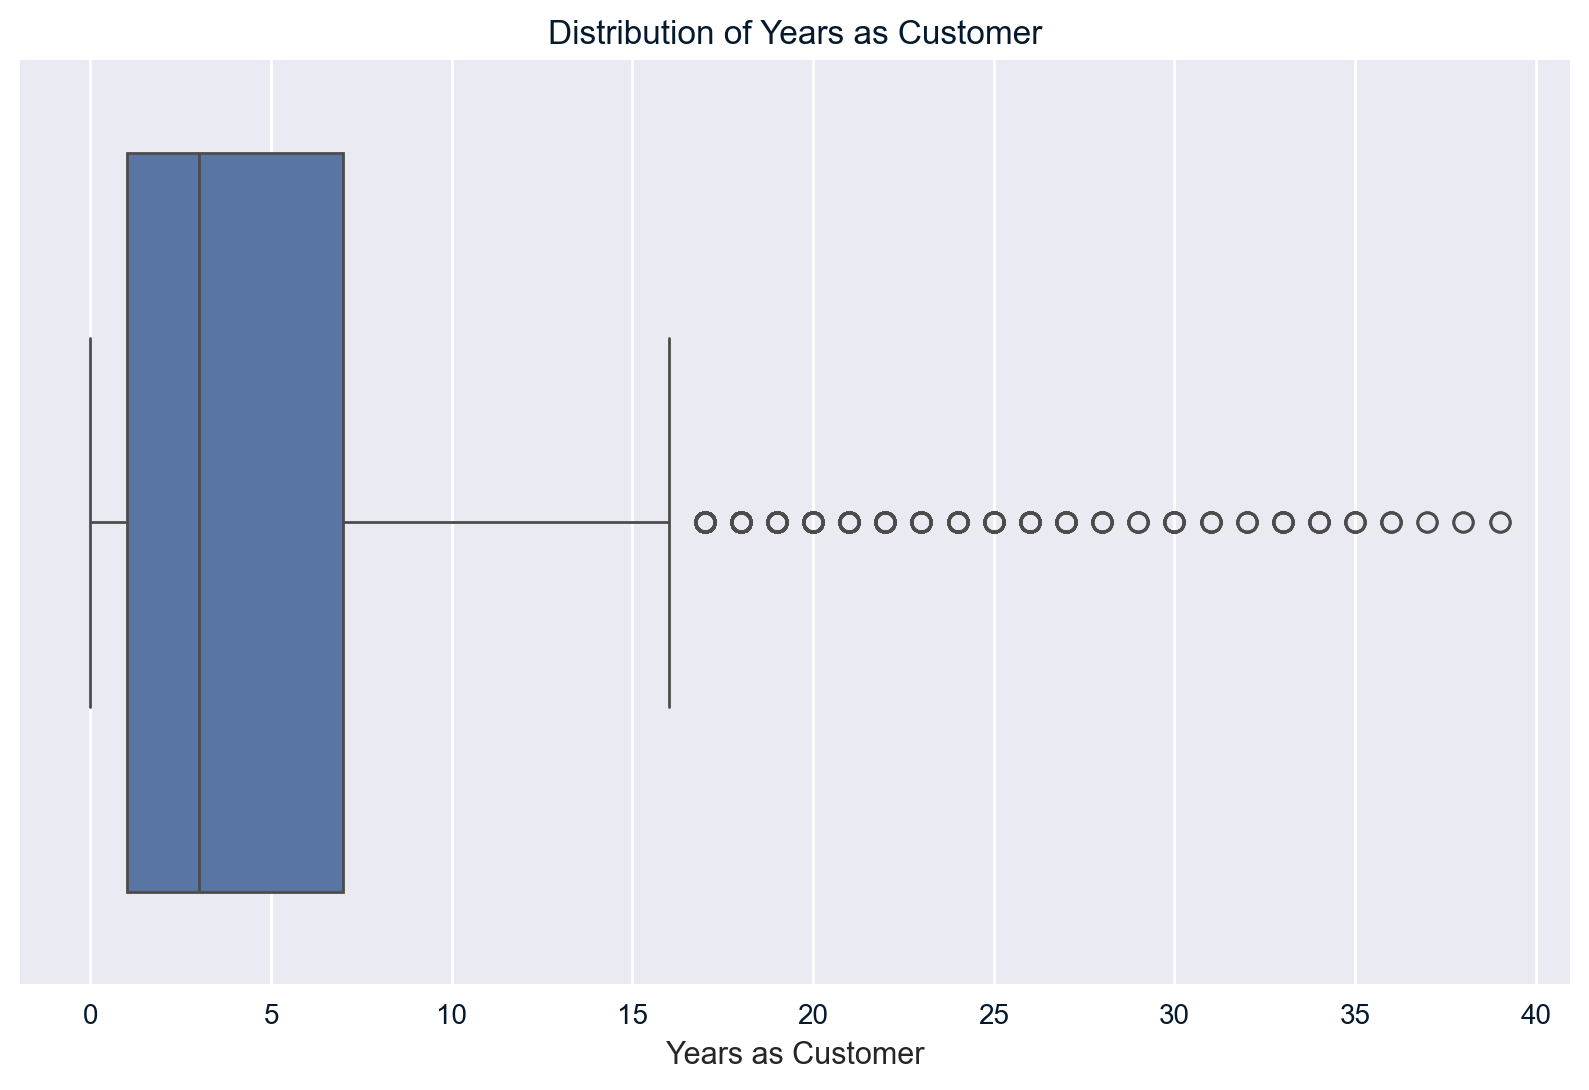

In [50]:
# Distribution of Years as Customer (single variable)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['years_as_customer'])
plt.title('Distribution of Years as Customer')
plt.xlabel('Years as Customer')
plt.show()

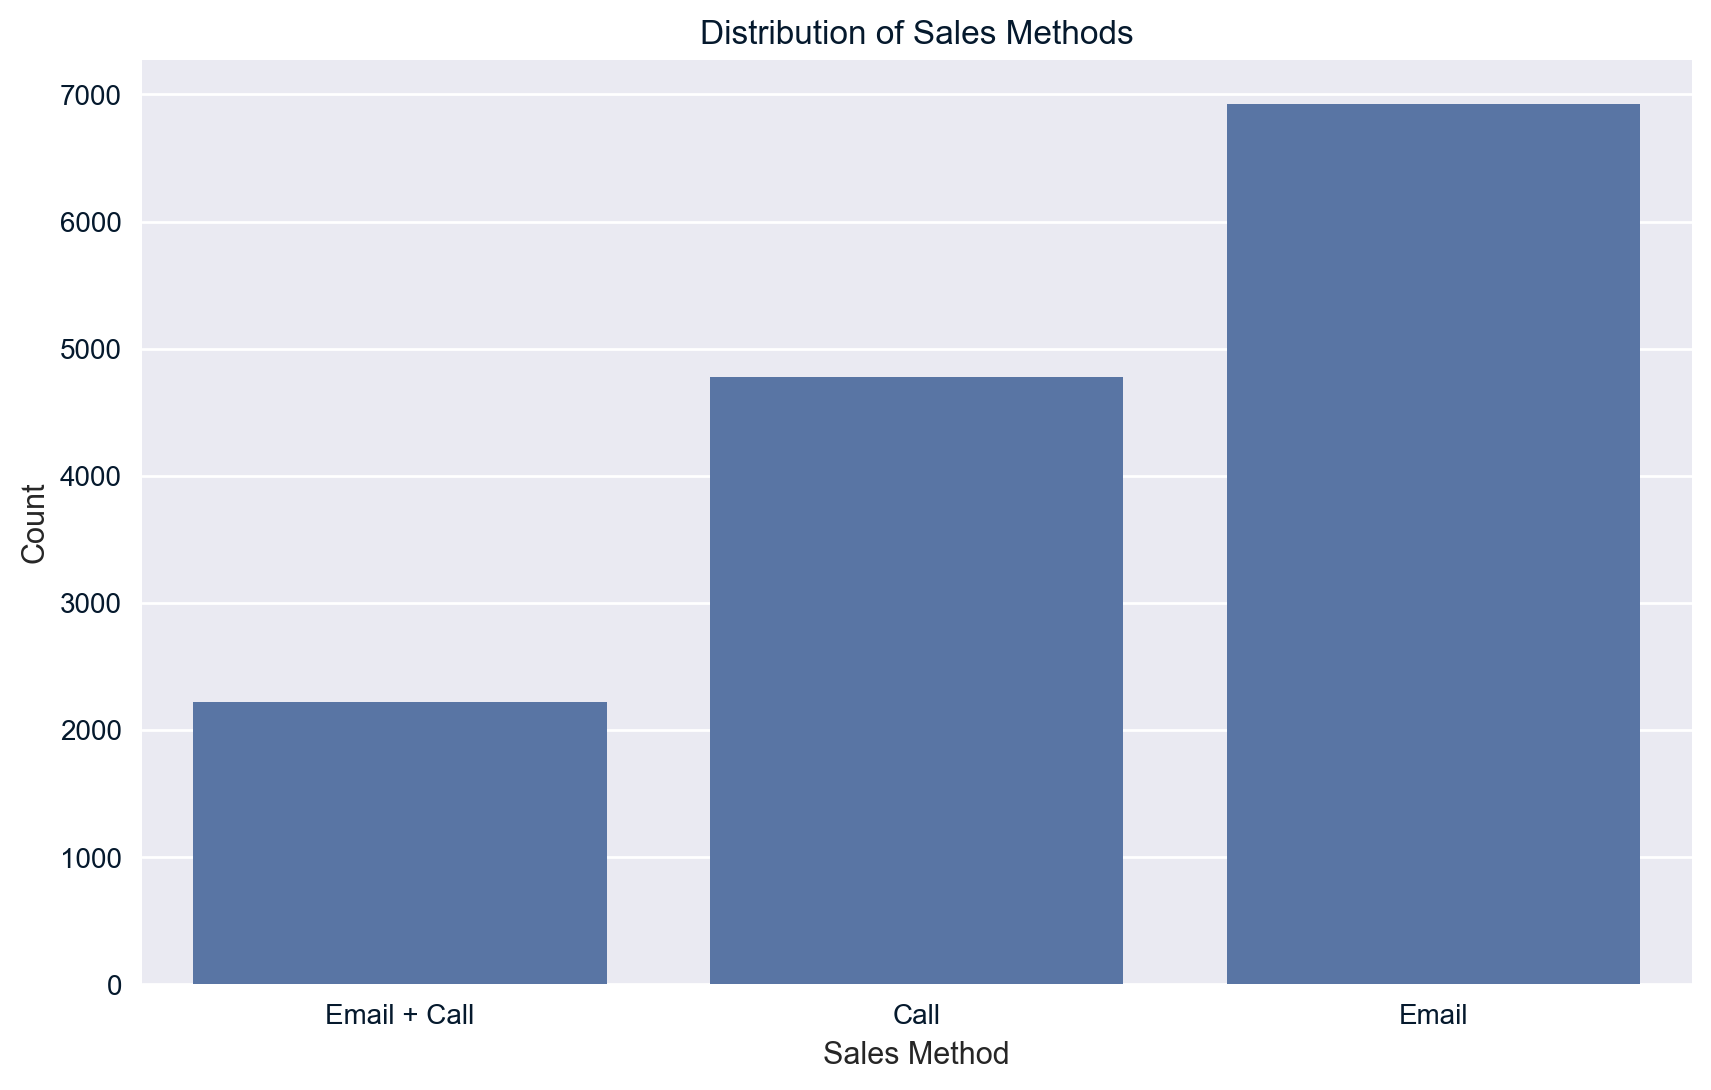

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_method', data=df)
plt.title('Distribution of Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

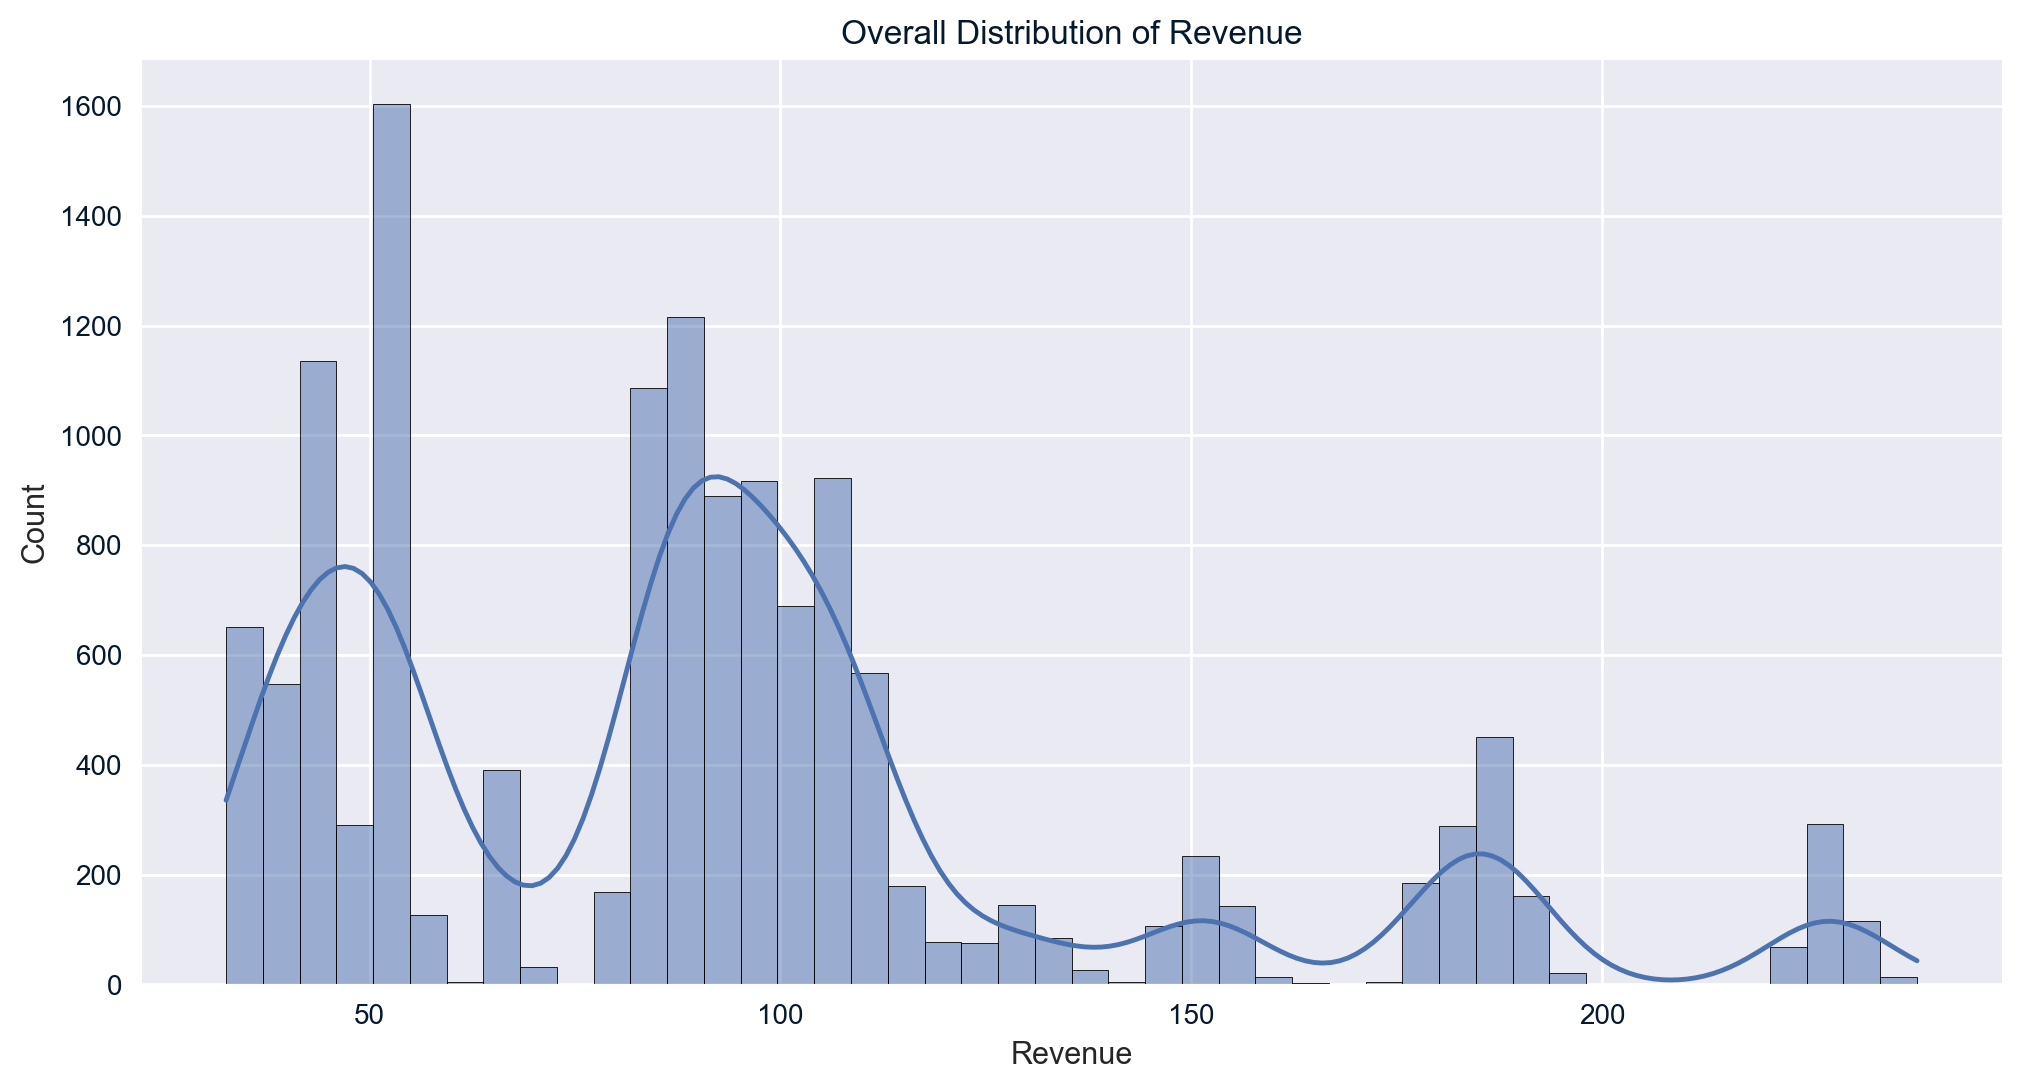

In [27]:
# Revenue Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='revenue', kde=True)
plt.title('Overall Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

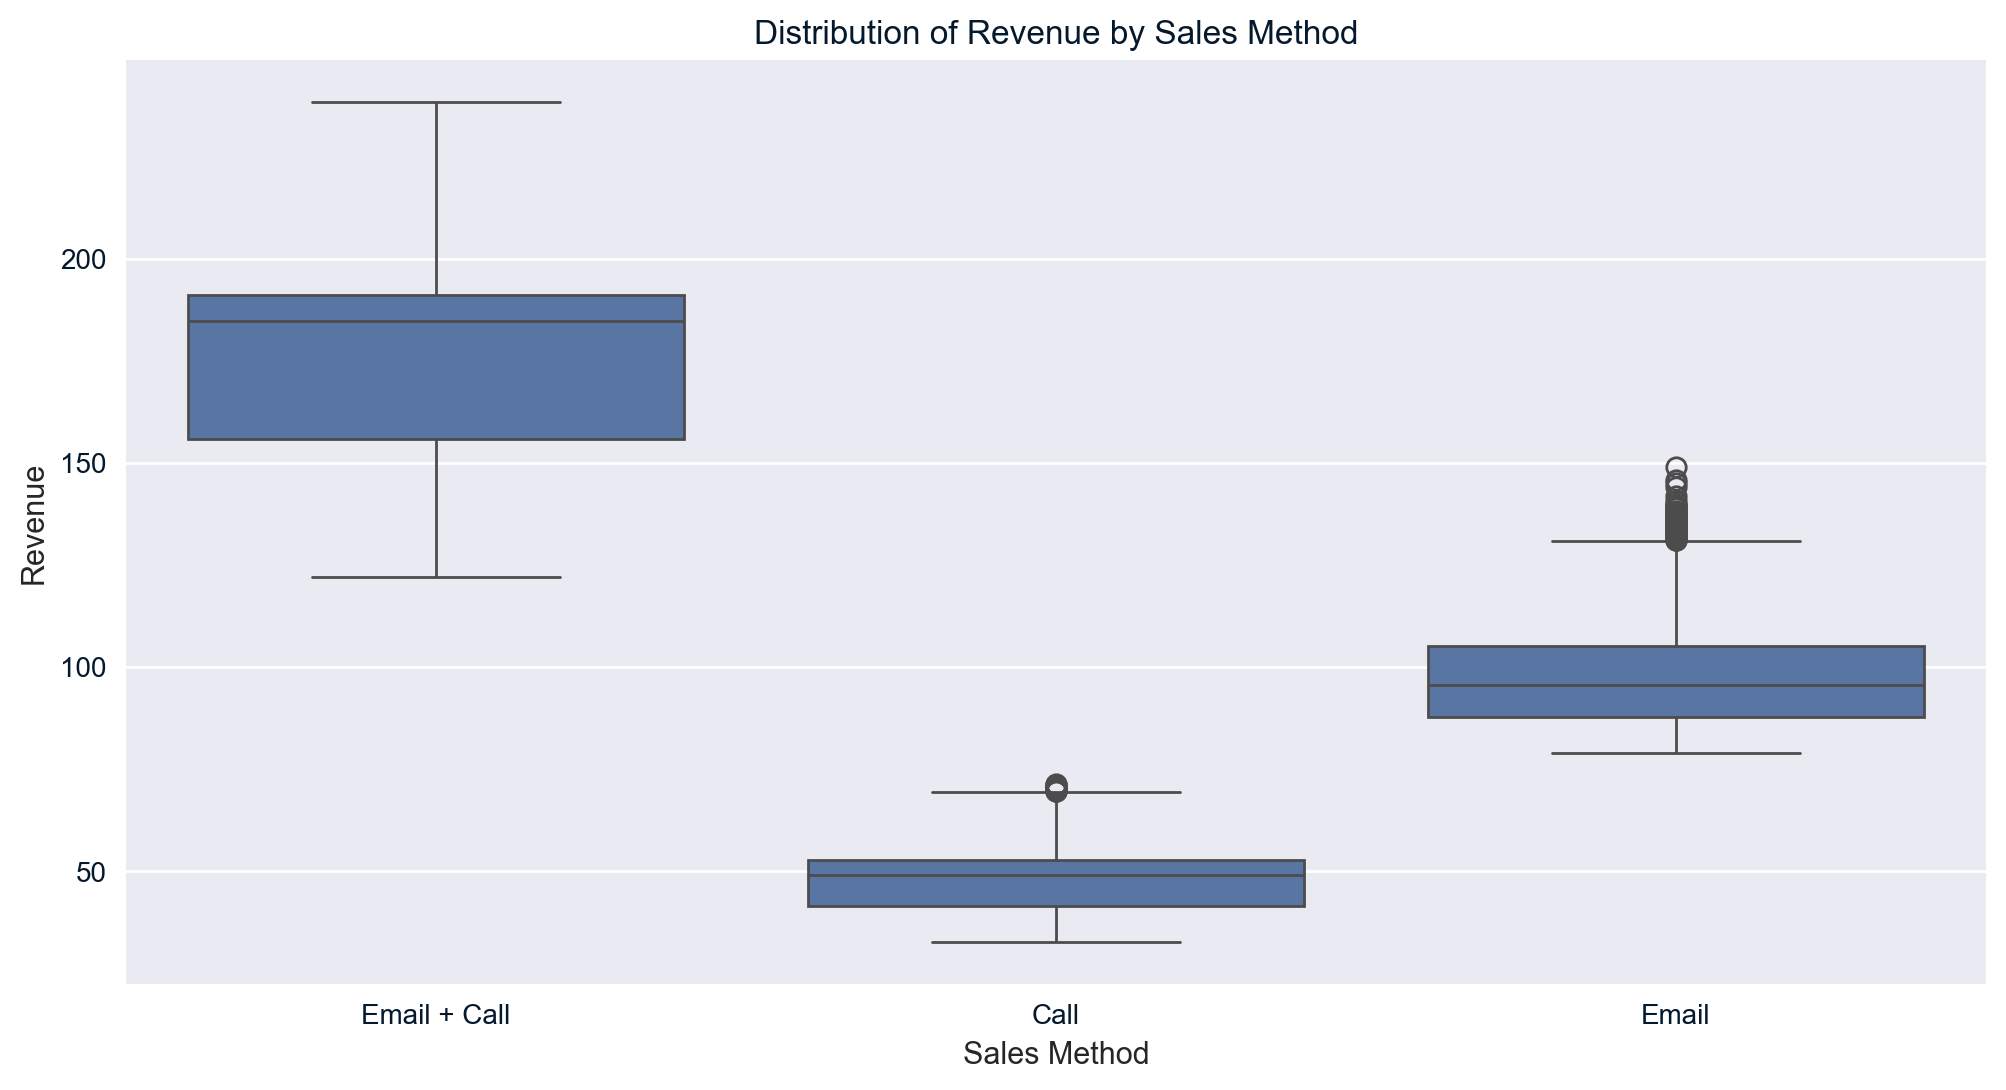

In [29]:
# Revenue by Sales Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='sales_method', y='revenue', data=df)
plt.title('Distribution of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

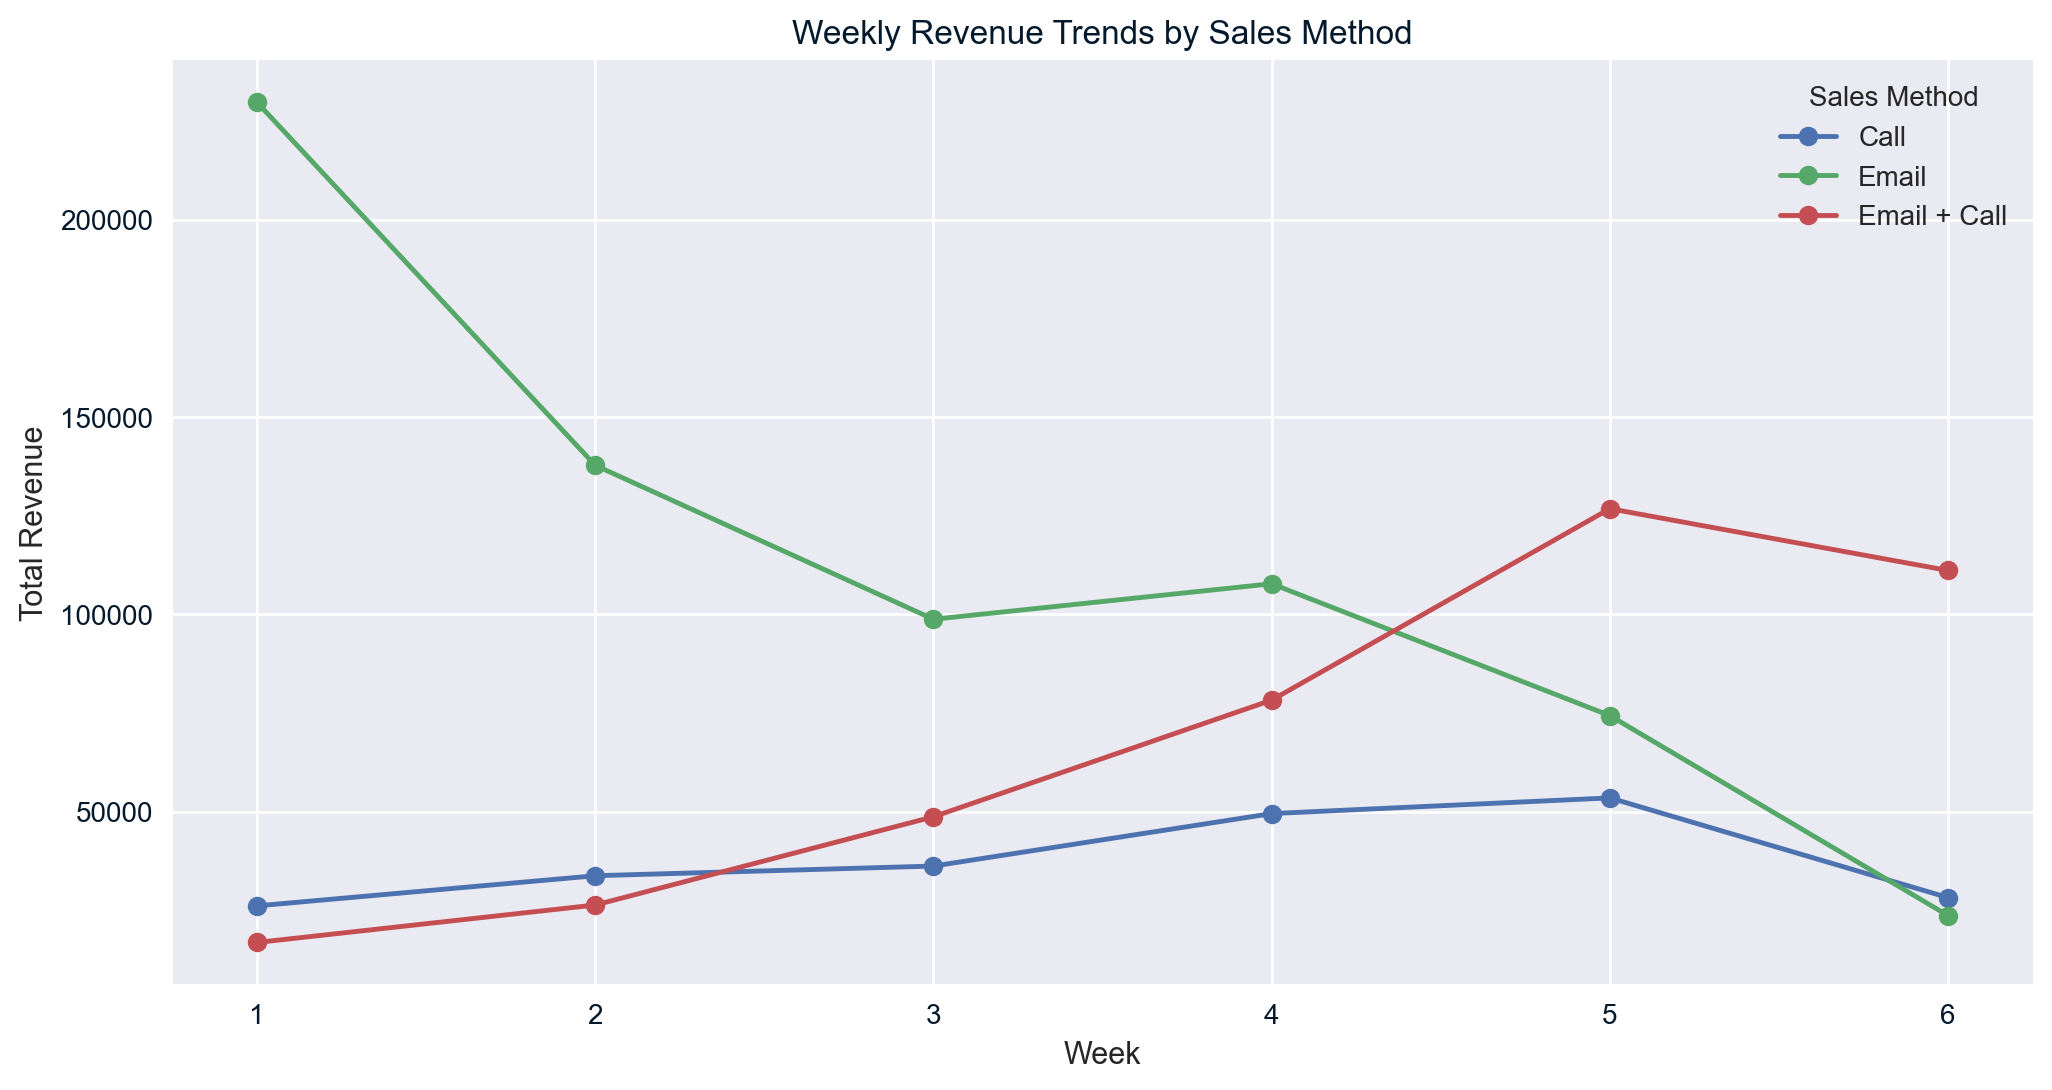

In [30]:
# Revenue Trends Over Time
weekly_revenue = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
weekly_revenue.plot(figsize=(12, 6), marker='o')
plt.title('Weekly Revenue Trends by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()


Average Revenue per Sale:
sales_method
Email + Call    183.651233
Email            97.127671
Call             47.596866
Name: revenue, dtype: float64


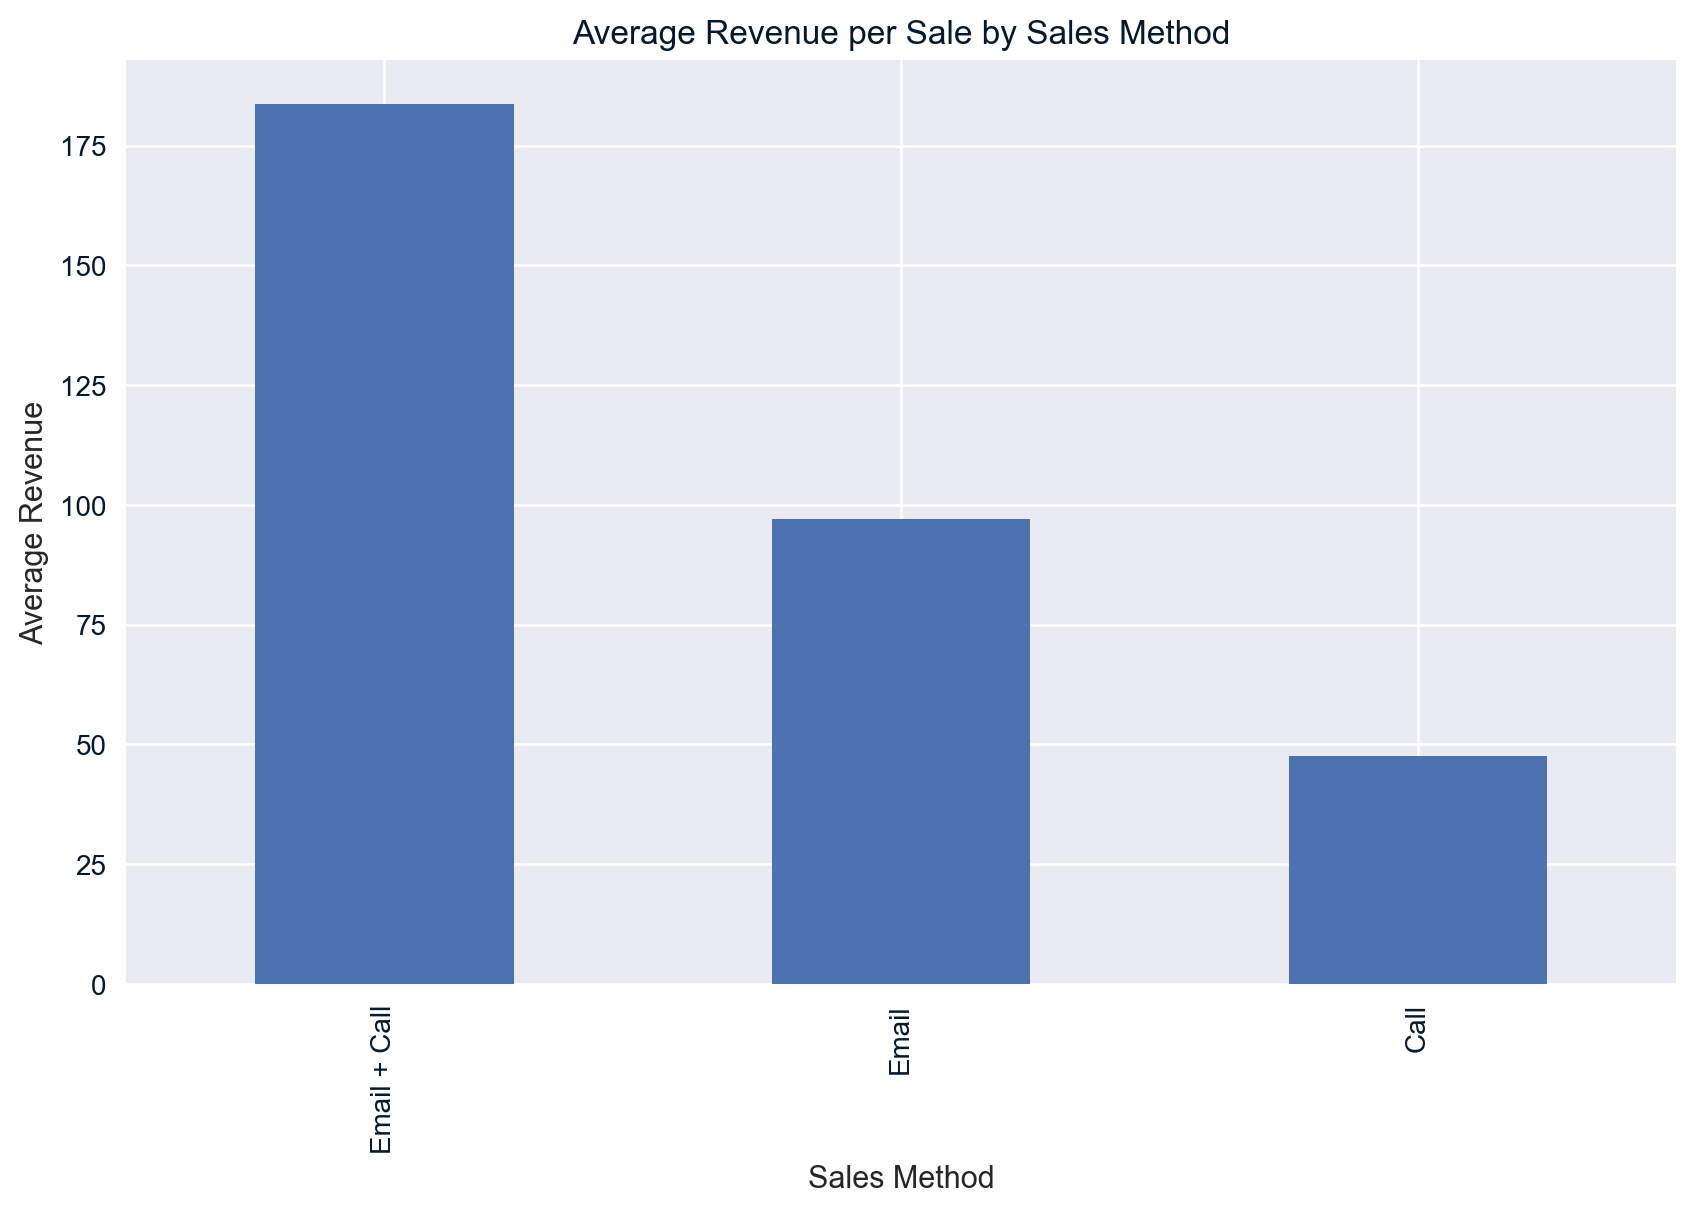

In [31]:
# Average Revenue per Sale
avg_revenue = df.groupby('sales_method')['revenue'].mean().sort_values(ascending=False)
print("\nAverage Revenue per Sale:")
print(avg_revenue)

plt.figure(figsize=(10, 6))
avg_revenue.plot(kind='bar')
plt.title('Average Revenue per Sale by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.show()

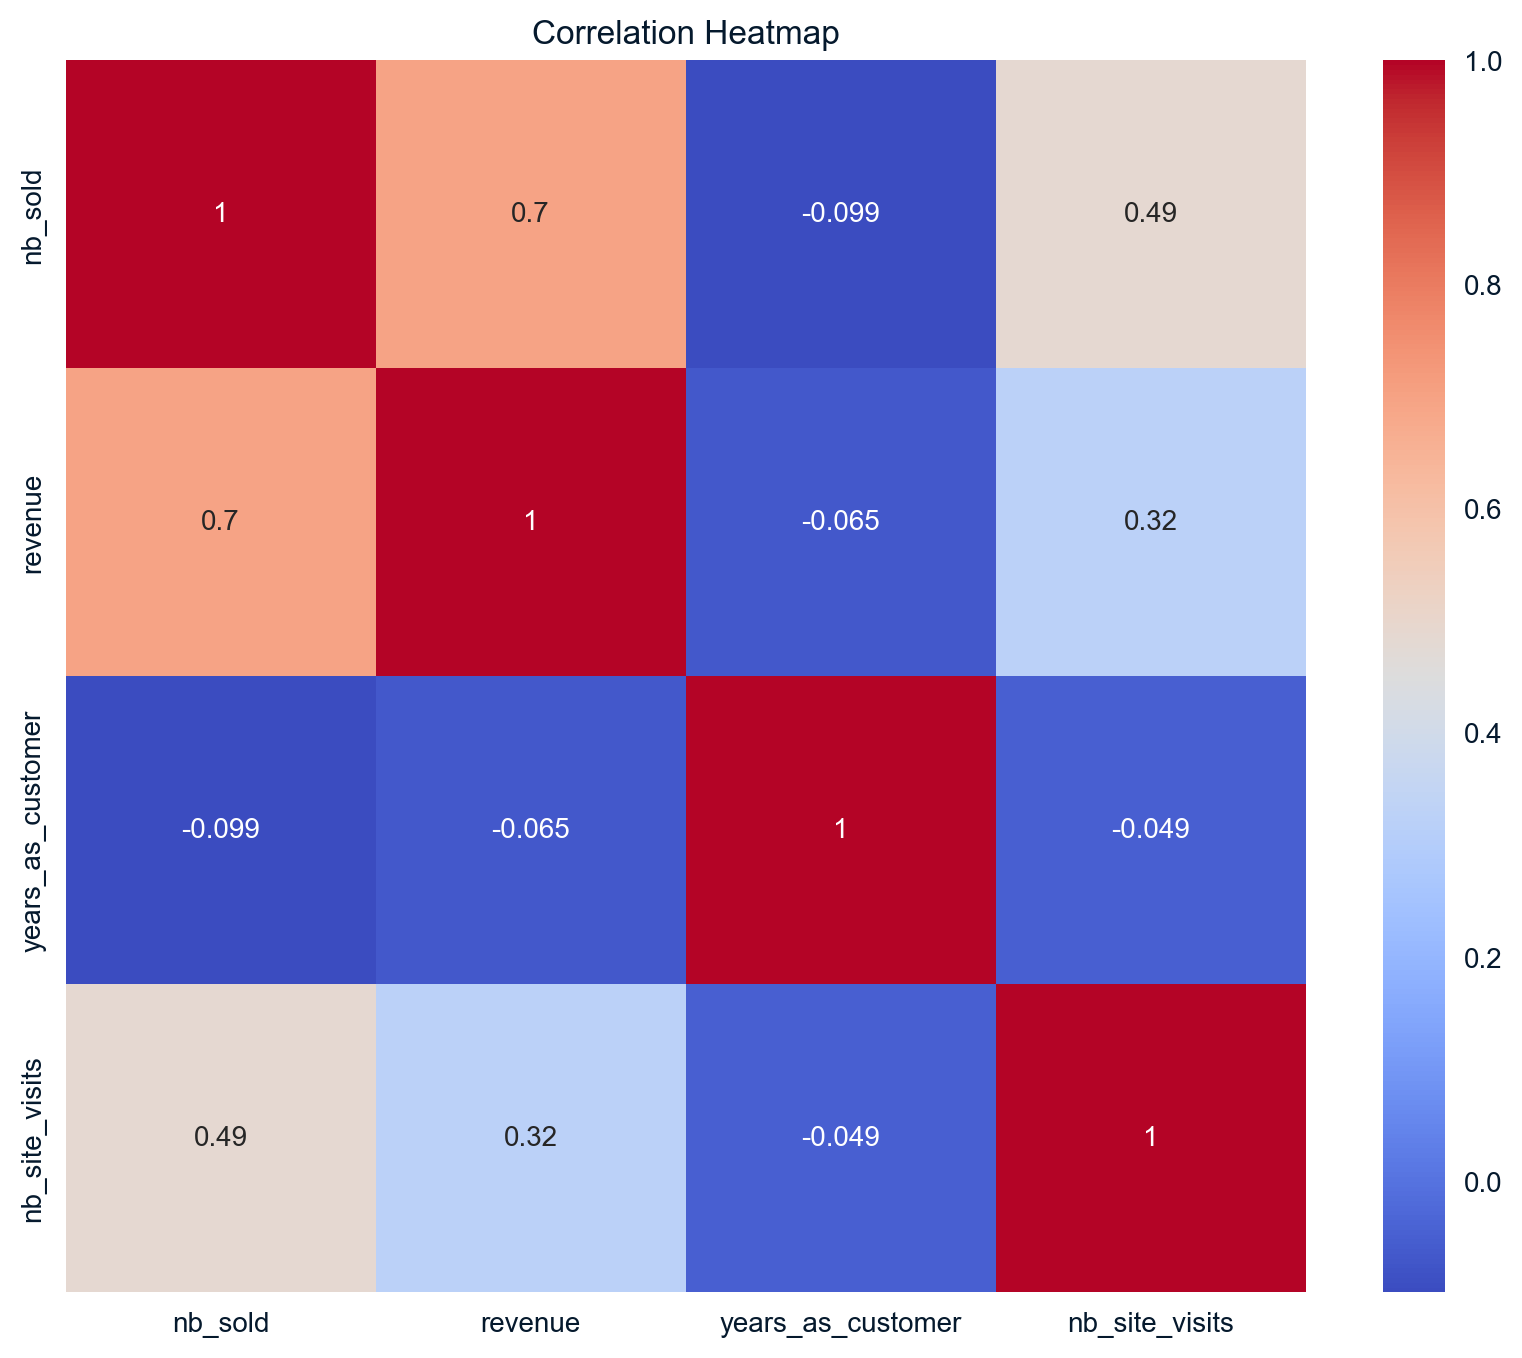

In [32]:
# Correlation Analysis
correlation = df[['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

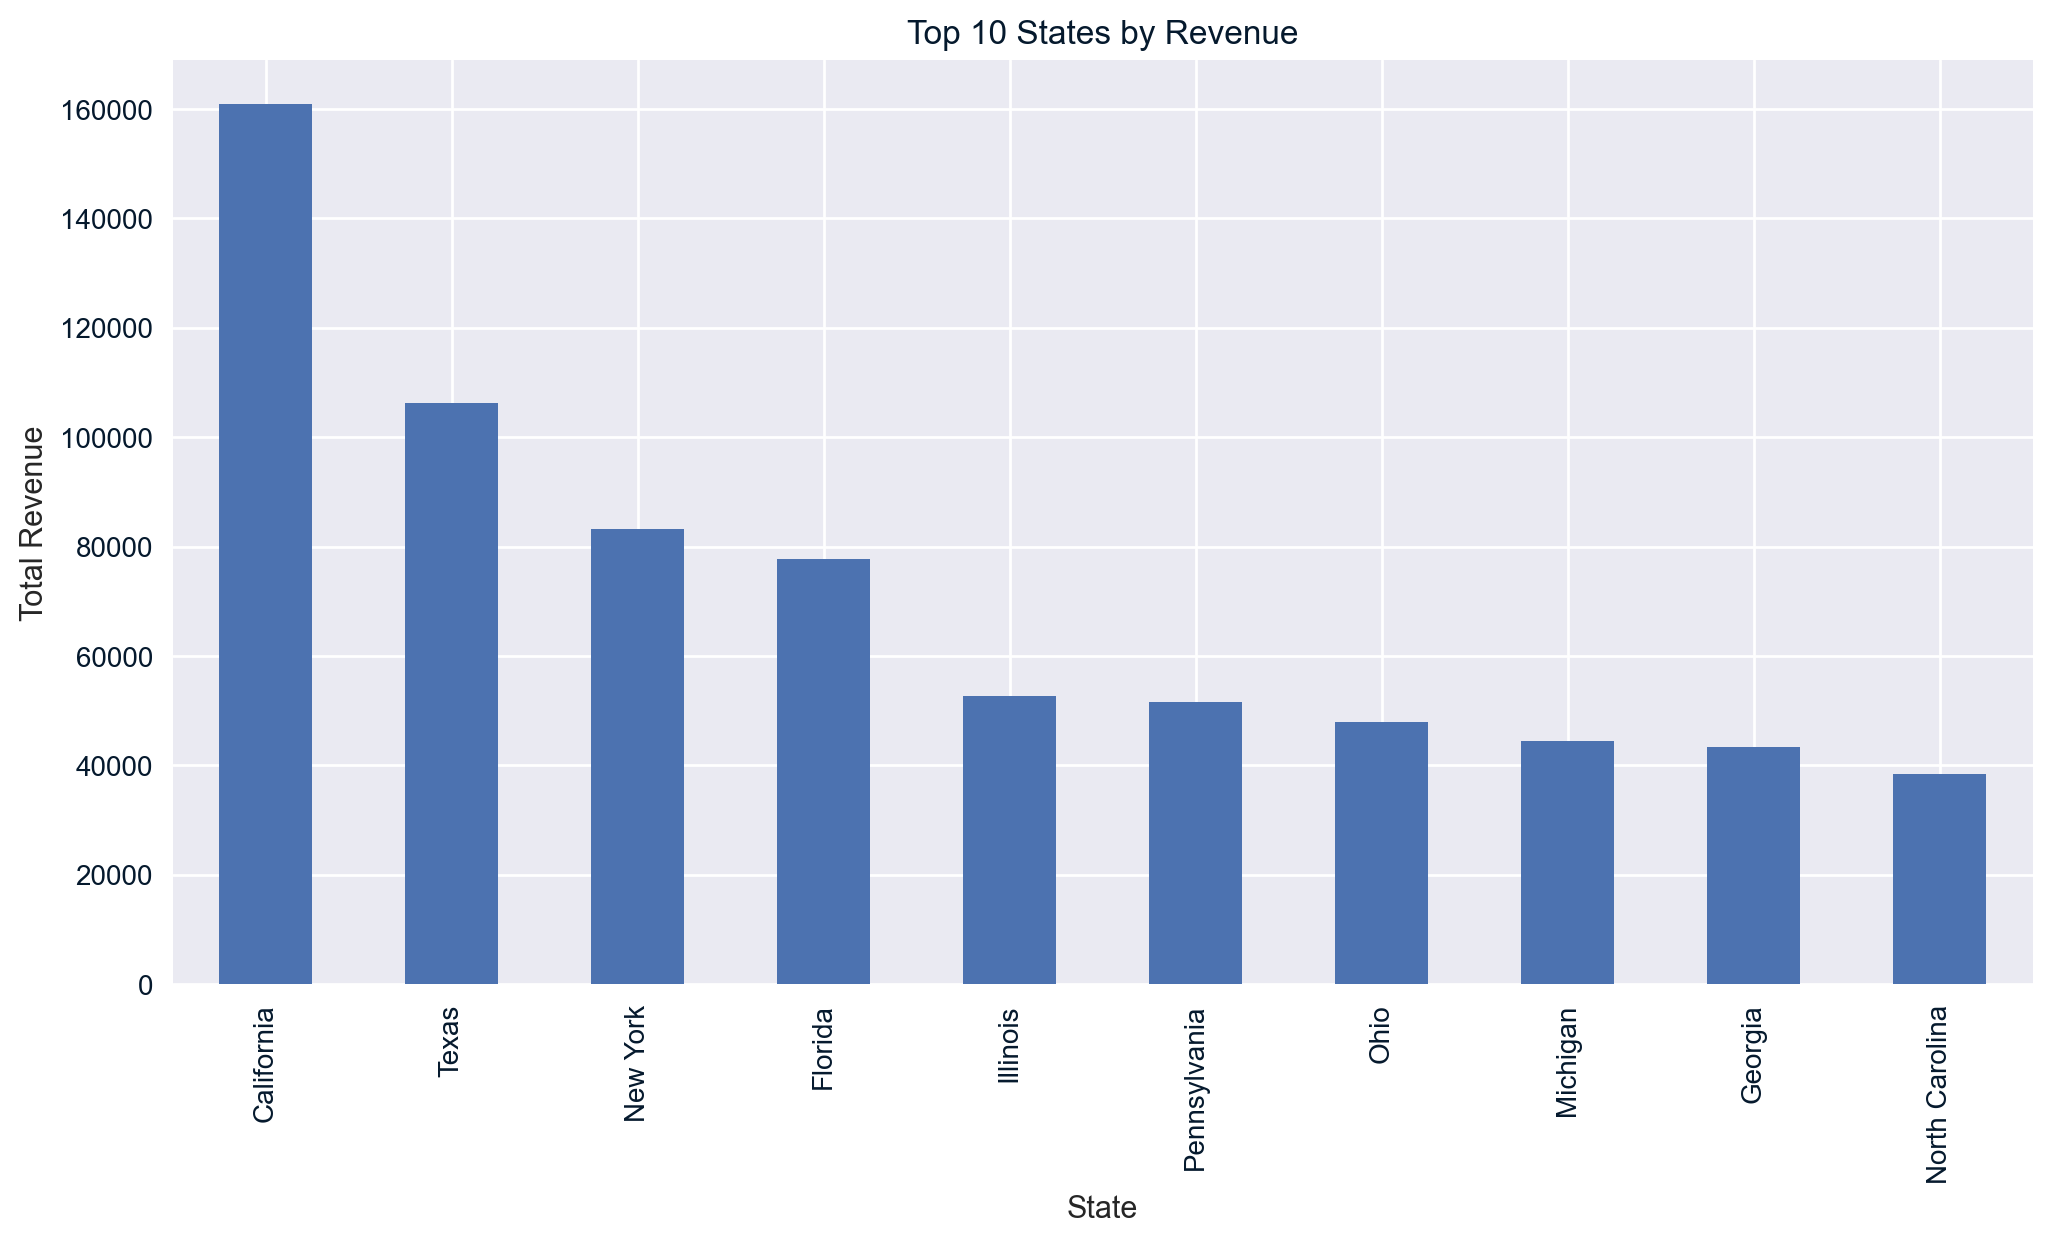

In [33]:
# Revenue by State
top_10_states = df.groupby('state')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar')
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()

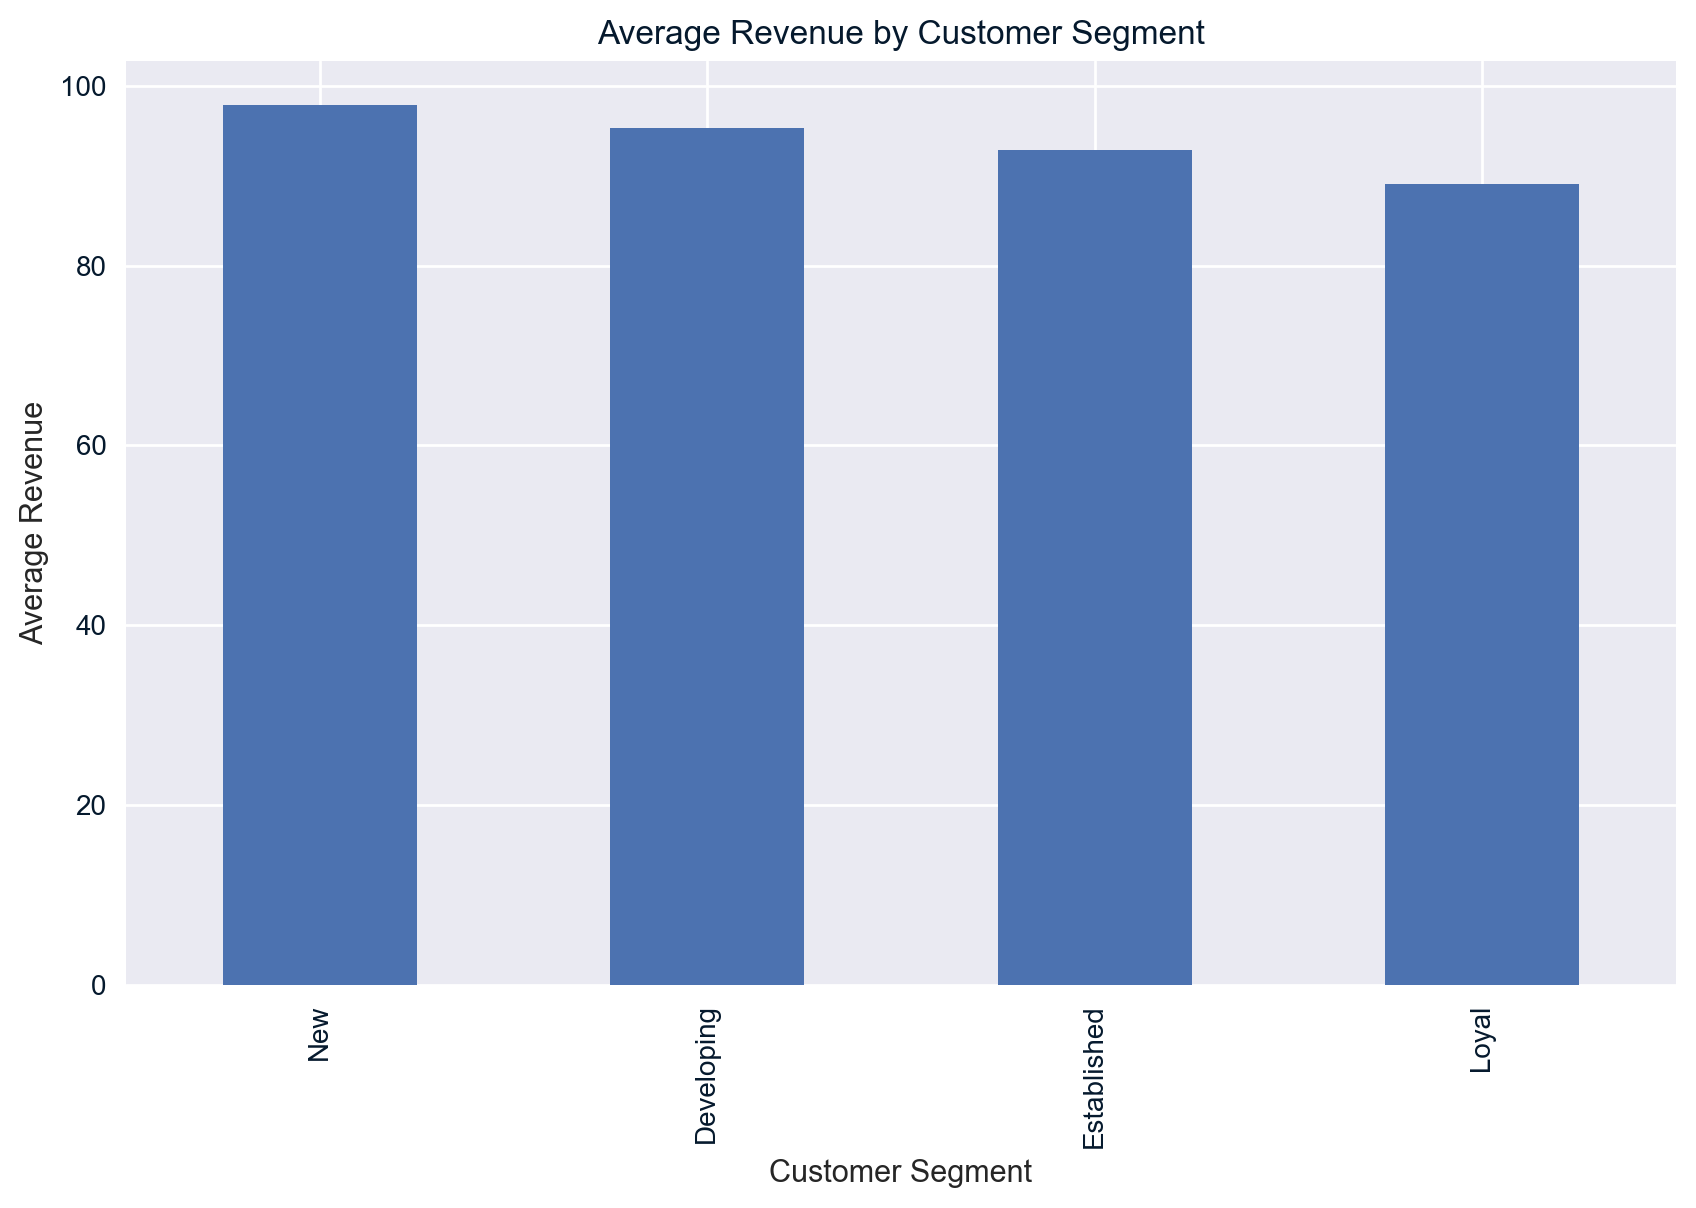

In [34]:
# Customer Segmentation
df['customer_segment'] = pd.qcut(df['years_as_customer'], q=4, labels=['New', 'Developing', 'Established', 'Loyal'])
segment_revenue = df.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
segment_revenue.plot(kind='bar')
plt.title('Average Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Revenue')
plt.show()

In [35]:
# Sales Method Efficiency
method_efficiency = df.groupby('sales_method').agg({
    'revenue': 'sum',
    'nb_sold': 'sum',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'total_customers'})

method_efficiency['avg_revenue_per_customer'] = method_efficiency['revenue'] / method_efficiency['total_customers']
method_efficiency['avg_items_per_customer'] = method_efficiency['nb_sold'] / method_efficiency['total_customers']

print("Sales Method Efficiency:")
print(method_efficiency)

Sales Method Efficiency:
                revenue  ...  avg_items_per_customer
sales_method             ...                        
Call          227513.02  ...                9.500837
Email         672220.61  ...                9.723017
Email + Call  408256.69  ...               12.186685

[3 rows x 5 columns]


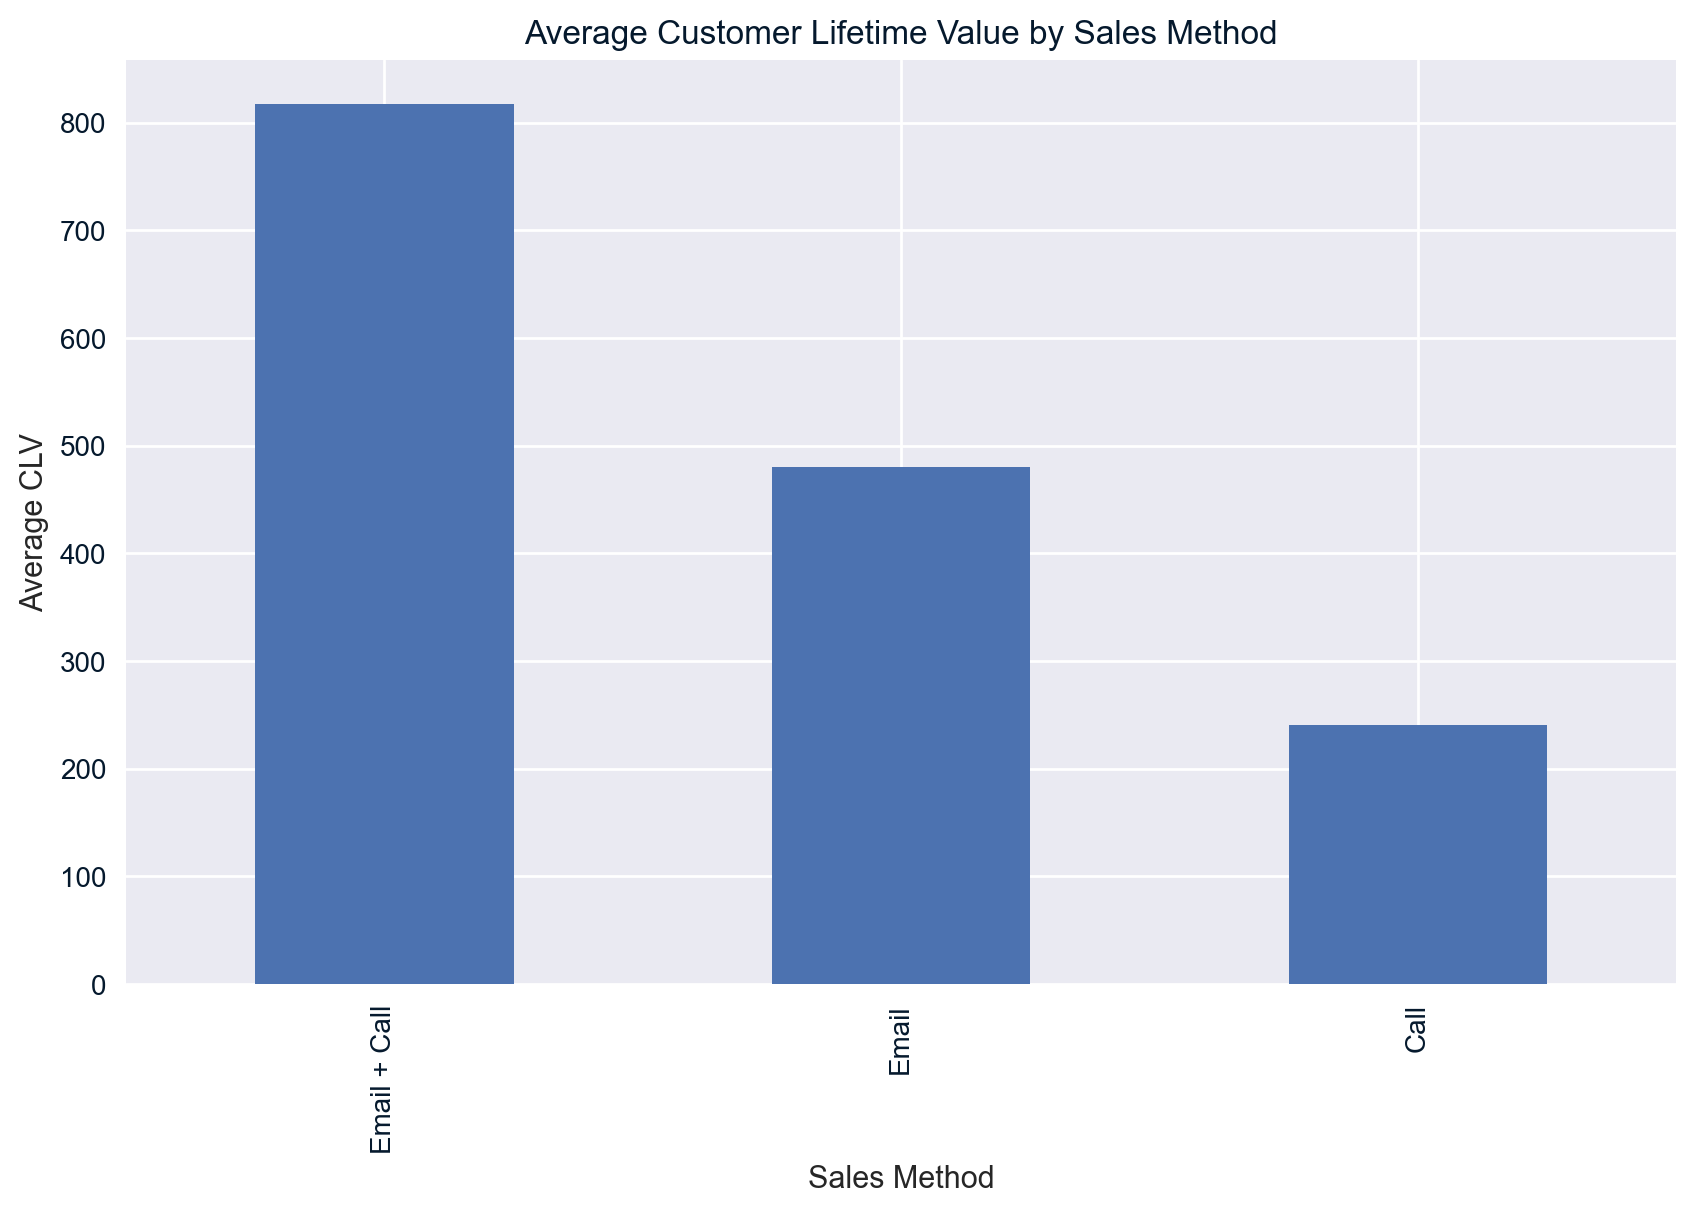

In [36]:
# Customer Lifetime Value (CLV) Analysis
df['clv'] = df['revenue'] * df['years_as_customer']
avg_clv = df.groupby('sales_method')['clv'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_clv.plot(kind='bar')
plt.title('Average Customer Lifetime Value by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average CLV')
plt.show()

In [37]:
# Conclusions and Recommendations
print("\nConclusions and Recommendations:")
print("1. The 'Email + Call' method consistently outperforms other methods in terms of revenue generation and efficiency.")
print("2. There's a strong positive correlation between the number of products sold and revenue.")
print("3. Customer loyalty (years as customer) has a moderate positive impact on revenue and CLV.")
print("4. Focus on improving the 'Email + Call' strategy and gradually phase out the 'Call' only approach.")
print("5. Implement targeted marketing campaigns for the top-performing states.")
print("6. Develop retention strategies for 'Loyal' customers while nurturing 'New' and 'Developing' segments.")
print("7. Monitor and optimize the number of site visits, as it shows a positive correlation with revenue.")
print("8. Consider seasonal trends in sales and adjust strategies accordingly.")
print("9. Invest in strategies to increase the average number of items sold per customer, as it directly impacts revenue.")
print("10. Develop a long-term strategy to increase Customer Lifetime Value, particularly for customers acquired through the 'Email + Call' method.")


Conclusions and Recommendations:
1. The 'Email + Call' method consistently outperforms other methods in terms of revenue generation and efficiency.
2. There's a strong positive correlation between the number of products sold and revenue.
3. Customer loyalty (years as customer) has a moderate positive impact on revenue and CLV.
4. Focus on improving the 'Email + Call' strategy and gradually phase out the 'Call' only approach.
5. Implement targeted marketing campaigns for the top-performing states.
6. Develop retention strategies for 'Loyal' customers while nurturing 'New' and 'Developing' segments.
7. Monitor and optimize the number of site visits, as it shows a positive correlation with revenue.
8. Consider seasonal trends in sales and adjust strategies accordingly.
9. Invest in strategies to increase the average number of items sold per customer, as it directly impacts revenue.
10. Develop a long-term strategy to increase Customer Lifetime Value, particularly for customers acquired t


Suggested Metric to Monitor: Weekly Revenue per Sales Method
Initial values for 'Email + Call' method:
week
1     16885.33
2     26376.23
3     48737.14
4     78296.20
5    126809.72
6    111152.07
Name: Email + Call, dtype: float64


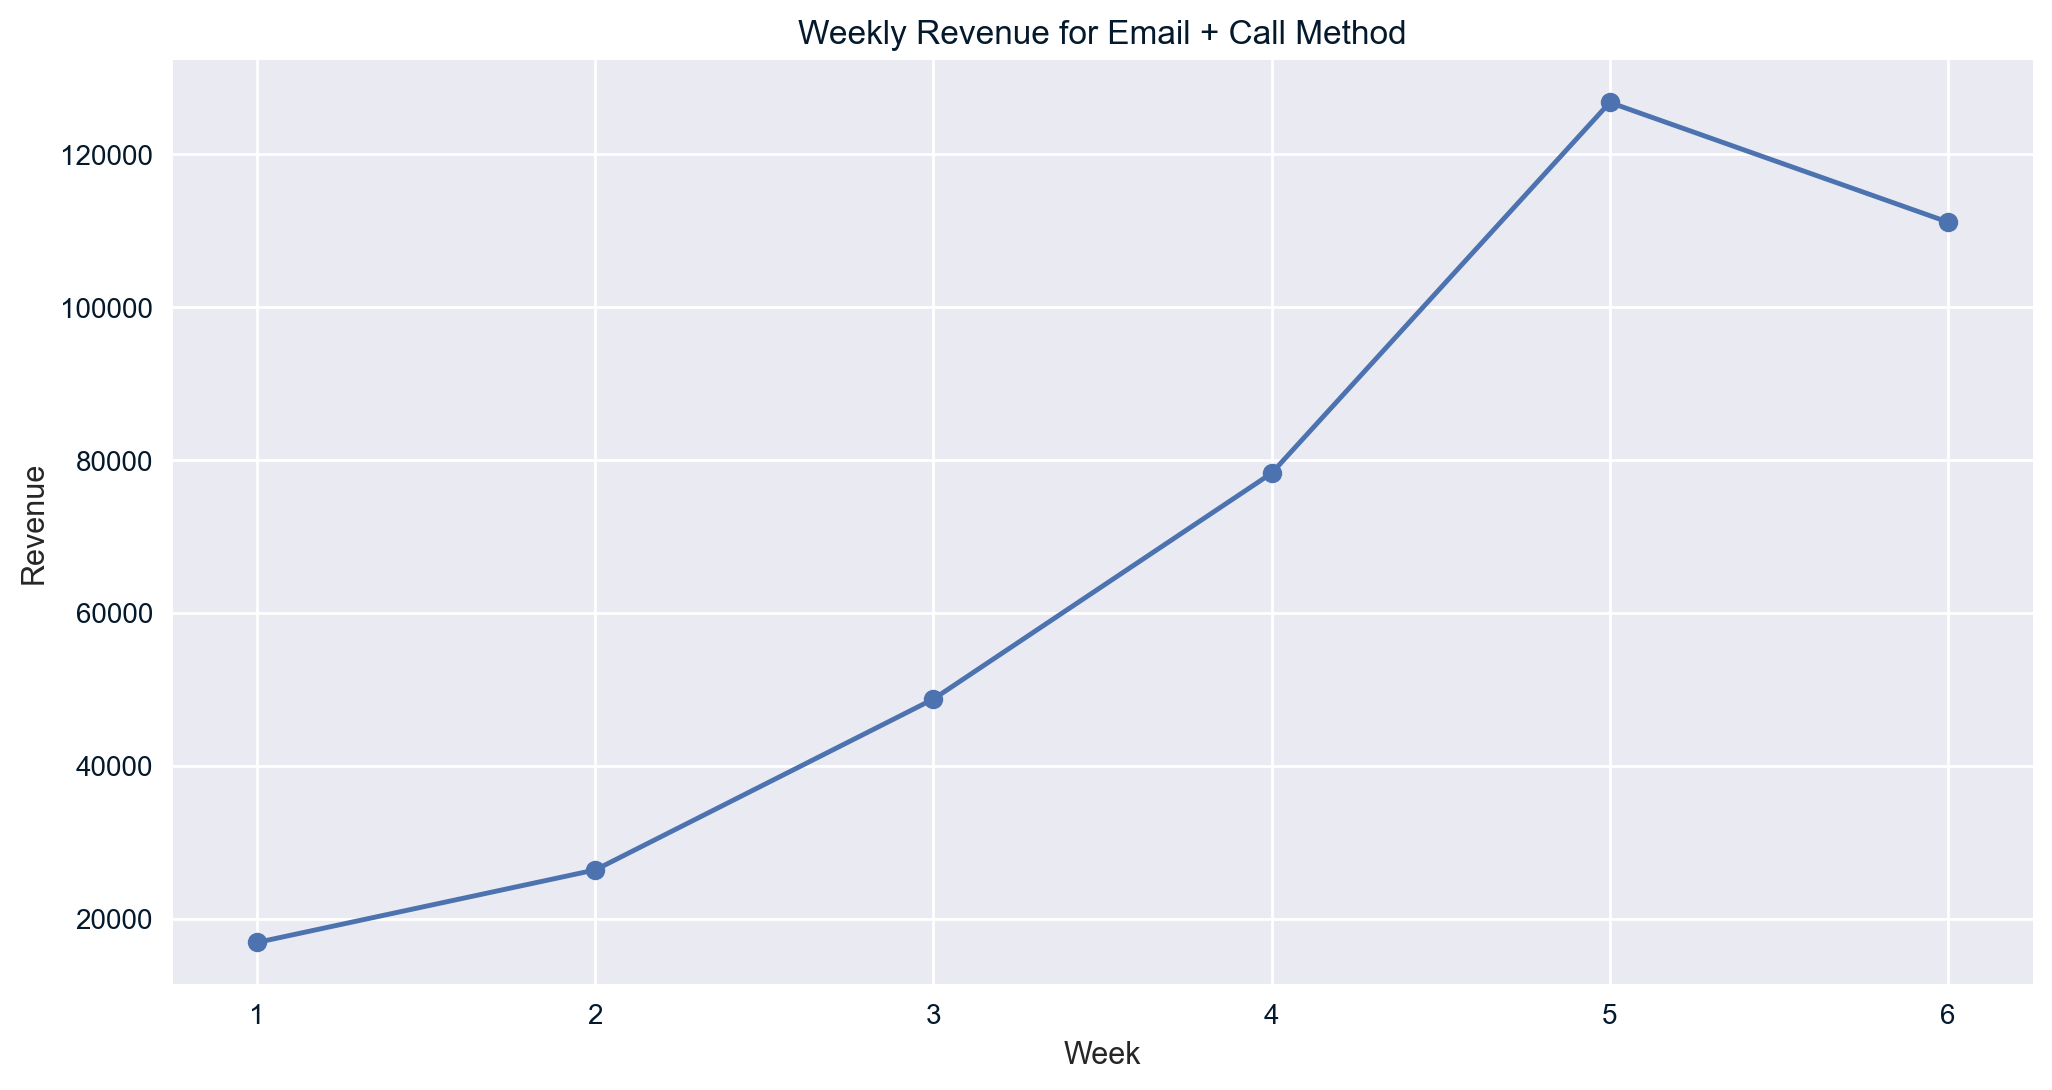

In [38]:
# Suggested Metric to Monitor
print("\nSuggested Metric to Monitor: Weekly Revenue per Sales Method")
print("Initial values for 'Email + Call' method:")
print(weekly_revenue['Email + Call'])

# Visualize the metric
plt.figure(figsize=(12, 6))
weekly_revenue['Email + Call'].plot(marker='o')
plt.title('Weekly Revenue for Email + Call Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation